### IDs:
Insert yours IDs to the cell below

ID #1: 807724

ID #2: 032480253


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import random
import warnings
warnings.filterwarnings('ignore')

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [2]:
df = pd.read_csv("heart.csv",delimiter='\t', header=0)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
5,NaN,1.0,0.0,140.0,192.0,0.0,1.0,NaN,0,0.4,1,0,1,1
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0,NaN,2,0,3,1
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0,1.6,2,0,2,1


The description of the features of the dataset is provided:
|Feature|Description|Type|
|---|---|---|
|age|Age in years|Numerical|
|sex|Sex (male=1, female=0)|Categorical|
|cp|Chest pain type (typical angina=1, atypical angina=2, non-anginal pain=3, asymptomatic=4)|Categorical|
|trestbps|Resting blood pressure (in mm Hg on admission to the hospital)|Numerical|
|chol|Serum cholestoral in mg/dl|Numerical|
|fbs|Fasting blood sugar > 120 mg/dl (true=1, false=0) |Categorical|
|thalach|Maximum heart rate achieved|Numerical|
|exang|Exercise induced angina (yes=1, no=0)|Categorical|
|oldpeak|ST depression induced by exercise relative to rest|Numerical|
|slope|The slope of the peak exercise ST segment (upsloping=1, flat=2, downsloping=3)|Categorical|
|ca|number of major vessels (0-3) colored by flourosopy|Categorical|
|thal|normal=3, fixed defect=6, reversable defect=7|Categorical|
|target|Presence of heart disease in patient (presence=1, absence=0)|Categorical|

In [3]:
#Input missing values

# Median for numerical features: age, trestbps, chol, thalach, oldpeak
df['age'].replace([np.nan], round(df['age'].median()), inplace=True)
df['trestbps'].replace([np.nan], df['trestbps'].median(), inplace=True)
df['chol'].replace([np.nan], df['chol'].median(), inplace=True)
df['thalach'].replace([np.nan], df['thalach'].median(), inplace=True)
df['oldpeak'].replace([np.nan], df['oldpeak'].median(), inplace=True)

# Mode for categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal
df['sex'].replace([np.nan], df['sex'].mode()[0], inplace=True)
df['cp'].replace([np.nan], df['cp'].mode()[0], inplace=True)
df['fbs'].replace([np.nan], df['fbs'].mode()[0], inplace=True)
df['restecg'].replace([np.nan], df['restecg'].mode()[0], inplace=True)
df['exang'].replace([np.nan], df['exang'].mode()[0], inplace=True)
df['slope'].replace([np.nan], df['slope'].mode()[0], inplace=True)
df['ca'].replace([np.nan], df['ca'].mode()[0], inplace=True)
df['thal'].replace([np.nan], df['thal'].mode()[0], inplace=True)
df['target'].replace([np.nan], df['target'].mode()[0], inplace=True)

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,0.0,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,130.0,240.0,0.0,0.0,172.0,0,1.4,2,0,2,1
3,55.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,55.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
5,55.0,1.0,0.0,140.0,192.0,0.0,1.0,153.0,0,0.4,1,0,1,1
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0,1.3,1,0,2,1
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0,0.0,2,0,3,1
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0,0.8,2,0,3,1
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0,1.6,2,0,2,1


In [4]:
# Confirm there are no missing values left
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# General view of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,0.686469,0.953795,131.630363,245.848185,0.148515,0.524752,149.610561,0.326733,1.036634,1.399340,0.729373,2.313531,0.544554
std,8.964069,0.464696,1.031544,17.358758,51.604360,0.356198,0.519693,22.858624,0.469794,1.158160,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**1. Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.**

When inspecting the histograms of each numerical feature we take as initial guess that age, trestbps, chol and thalach follow a normal distribution whereas oldpeak follows a poisson distribution.

In [6]:
# Confidence interval for age, trestbps, chol, thalach, oldpeak
numerical = ["age","trestbps","chol","thalach","oldpeak"]
healthy_low = []
healthy_up = []
disease_low = []
disease_up = []

for num in numerical:
    if num != "oldpeak":
        healthy_interval = stats.norm.interval(confidence=0.95, loc=np.mean(df.query("target==0")[num]), scale=stats.sem(df.query("target==0")[num]))
        disease_interval = stats.norm.interval(confidence=0.95, loc=np.mean(df.query("target==1")[num]), scale=stats.sem(df.query("target==1")[num]))
        healthy_low.append(healthy_interval[0])
        disease_low.append(disease_interval[0])
        healthy_up.append(healthy_interval[1])
        disease_up.append(disease_interval[1])
    else:
        healthy_interval = stats.poisson.interval(confidence=0.95, mu=np.mean(df.query("target==0")[num]))
        disease_interval = stats.poisson.interval(confidence=0.95, mu=np.mean(df.query("target==1")[num]))
        healthy_low.append(healthy_interval[0])
        disease_low.append(disease_interval[0])
        healthy_up.append(healthy_interval[1])
        disease_up.append(disease_interval[1])
    print(f"{num}: healthy: {healthy_interval}, disease: {disease_interval}")

age: healthy: (55.3485669930146, 57.98476634031873), disease: (51.08433126719203, 53.945971763111004)
trestbps: healthy: (131.2735866725045, 137.52351477677087), disease: (126.90267287951107, 131.72763015079195)
chol: healthy: (242.33375679467298, 258.8111707415589), disease: (233.7764433007363, 250.0174960932031)
thalach: healthy: (135.31581248428446, 142.8291150519474), disease: (155.5008255621842, 161.34765928630068)
oldpeak: healthy: (0.0, 4.0), disease: (0.0, 2.0)


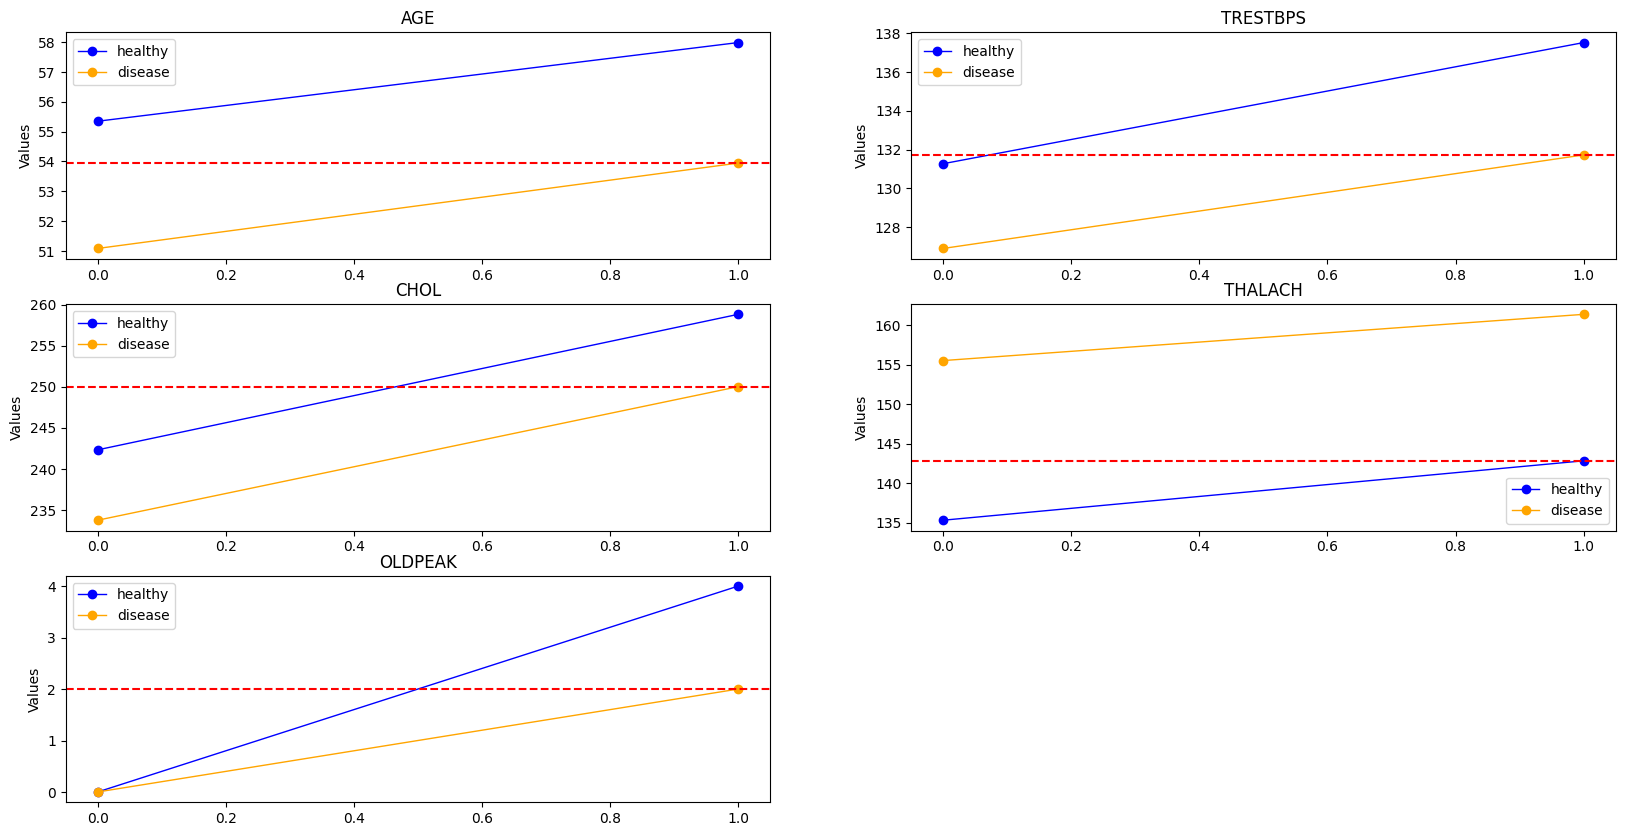

In [7]:
# Visually plot each variable's confidence interval for their mean
data_dict_healthy = {}
data_dict_disease = {}
data_dict_healthy['variable'] = numerical
data_dict_healthy['lower'] = healthy_low
data_dict_healthy['upper'] = healthy_up
data_dict_disease['variable'] = numerical
data_dict_disease['lower'] = disease_low
data_dict_disease['upper'] = disease_up
dataset_healthy = pd.DataFrame(data_dict_healthy)
dataset_disease = pd.DataFrame(data_dict_disease)

fig, ax = plt.subplots(ncols=5, nrows=1,figsize=(20, 10))
for n, num in enumerate(healthy_low):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    
    plt.plot((healthy_low[n], healthy_up[n]),"ro-", color='blue', linewidth=1, label=f"healthy")
    plt.plot((disease_low[n],disease_up[n]),"ro-",color='orange', linewidth=1, label=f"disease")
    if disease_up[n]<healthy_low[n]:
        plt.axhline(y = disease_up[n], color = 'r', linestyle = '--')
    if healthy_low[n]<disease_up[n] and disease_up[n]<healthy_up[n]:
        plt.axhline(y = disease_up[n], color = 'r', linestyle = '--')
    if healthy_low[n]<disease_up[n] and disease_up[n]>healthy_up[n]:
        plt.axhline(y = healthy_up[n], color = 'r', linestyle = '--')
        
    # chart formatting
    ax.set_title(numerical[n].upper())
    ax.set_xlabel("")
    ax.set_ylabel("Values")
    plt.legend()

Hence, for the following variables we can state with confidence of 95% that the healthy population has a bigger mean than the disease population:
* age

For the following variable we can state with confidence of 95% that the healthy population has a smaller mean than the disease population:
* thalach

For chol, trestbps and oldpeak we cannot state with confidence of 95% that the healthy population has a bigger or smaller mean than the disease population because there is an overlap of the calculated confidence intervals.

**2. Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.**

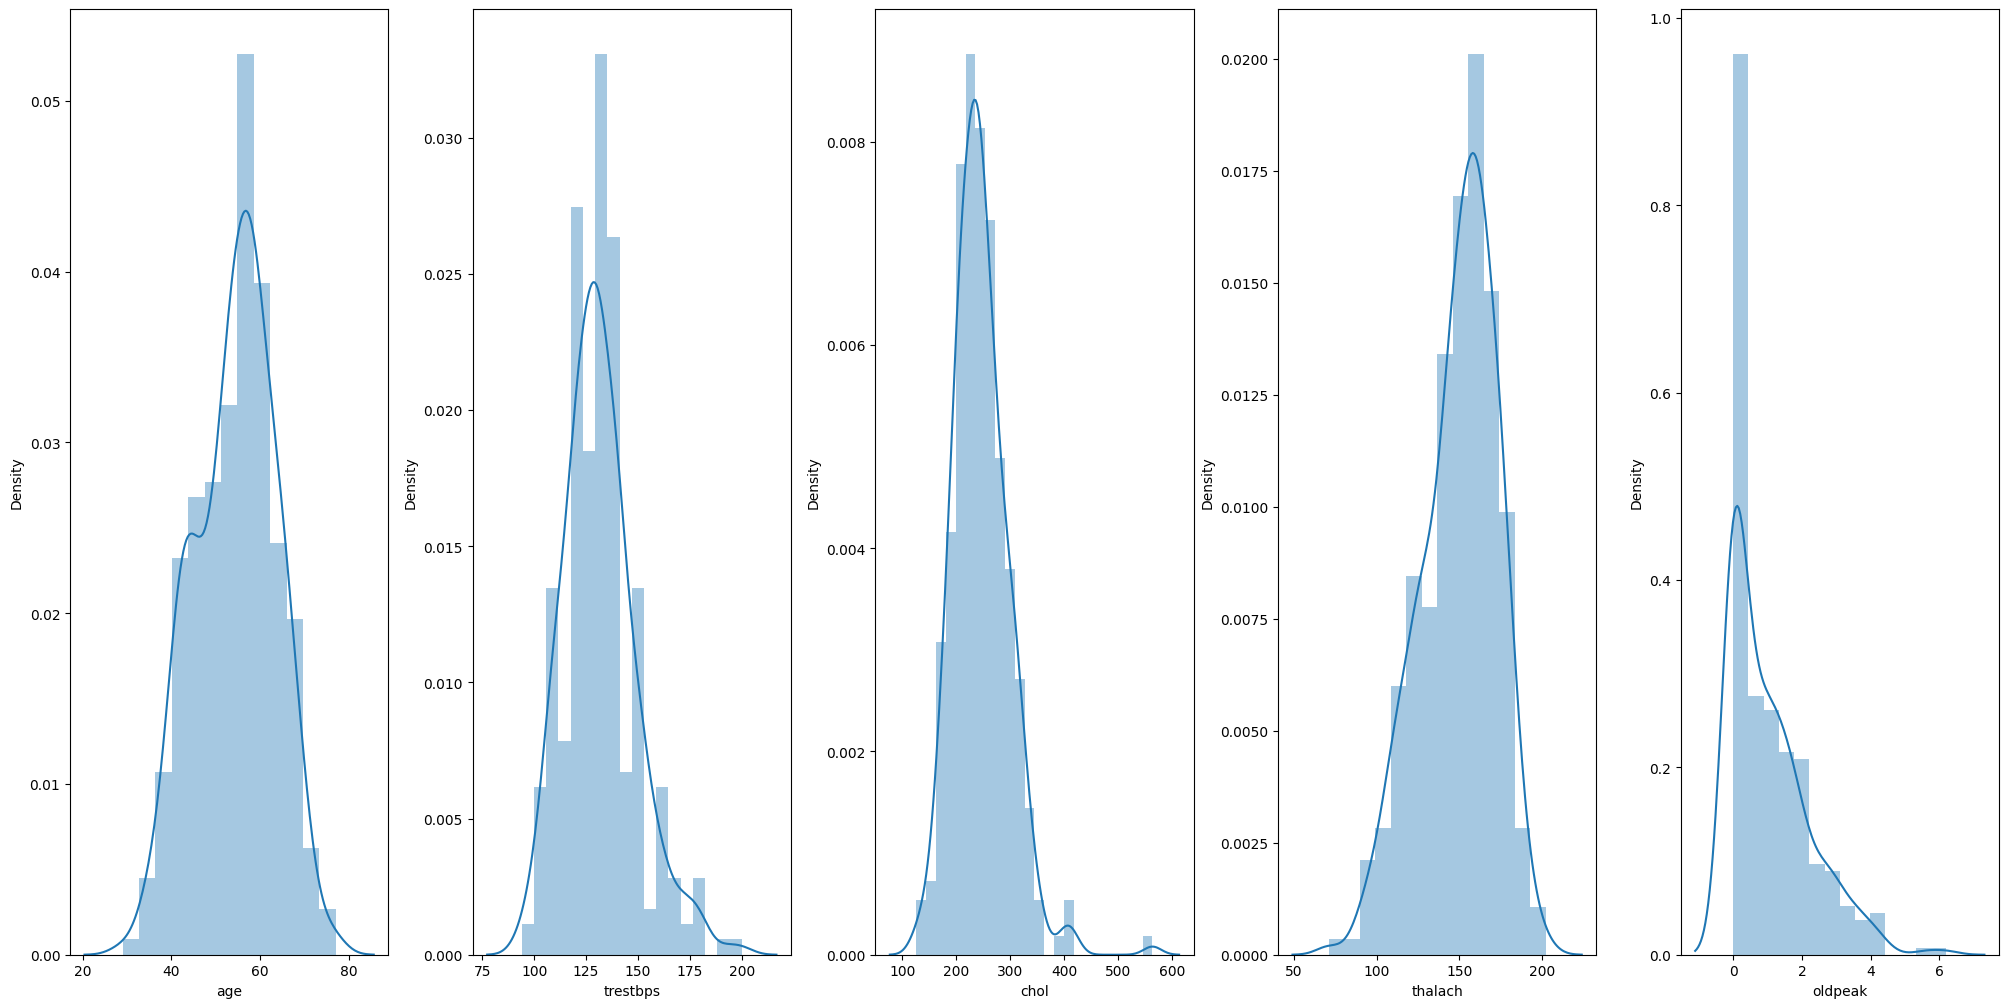

In [8]:
# Extract numerical columns
df2 = df[["age","trestbps","chol","thalach","oldpeak"]]

# Draw histograms for each numerical feature
fig2, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df2.iteritems():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By inspecting the histograms, we take as initial guess that the features age, trestbps, chol and thalach follow a normal distribution, whereas the oldpeak follows a poisson distribution.
To avoid very small numbers in likelihoods, one can opt to minimize the negative logarithm of the likelihood instead. 

In [9]:
from scipy import optimize
np.random.seed(10)

means = []
sigmas = []
nll_means = []
nll_stds = []

# Get the initial guesses
for i,n in enumerate(numerical[0:4]):
    means.append(df2[n].mean())
    sigmas.append(df2[n].std())

    # Get the samples
    samples = np.random.normal(loc=means[i], scale=sigmas[i], size=100)

    def normaldistribution_negloglikelihood(params):
        mu, sigma = params
        return -np.sum(stats.norm.logpdf(samples, loc=mu, scale=sigma))
    
    result = optimize.minimize(normaldistribution_negloglikelihood, x0=[0,1] ,bounds=((None,None), (1e-5,None)))
    
    nll_means.append(result.x[0])
    nll_stds.append(result.x[1])

    print(f"{n}: mean: {nll_means[i]}, sigma: {nll_stds[i]}")

age: mean: 55.11783707665486, sigma: 8.668612735181734
trestbps: mean: 132.83155963845186, sigma: 17.104189743755082
chol: mean: 244.614823292516, sigma: 47.1328759010808
thalach: mean: 151.4299915523287, sigma: 21.334316026466567


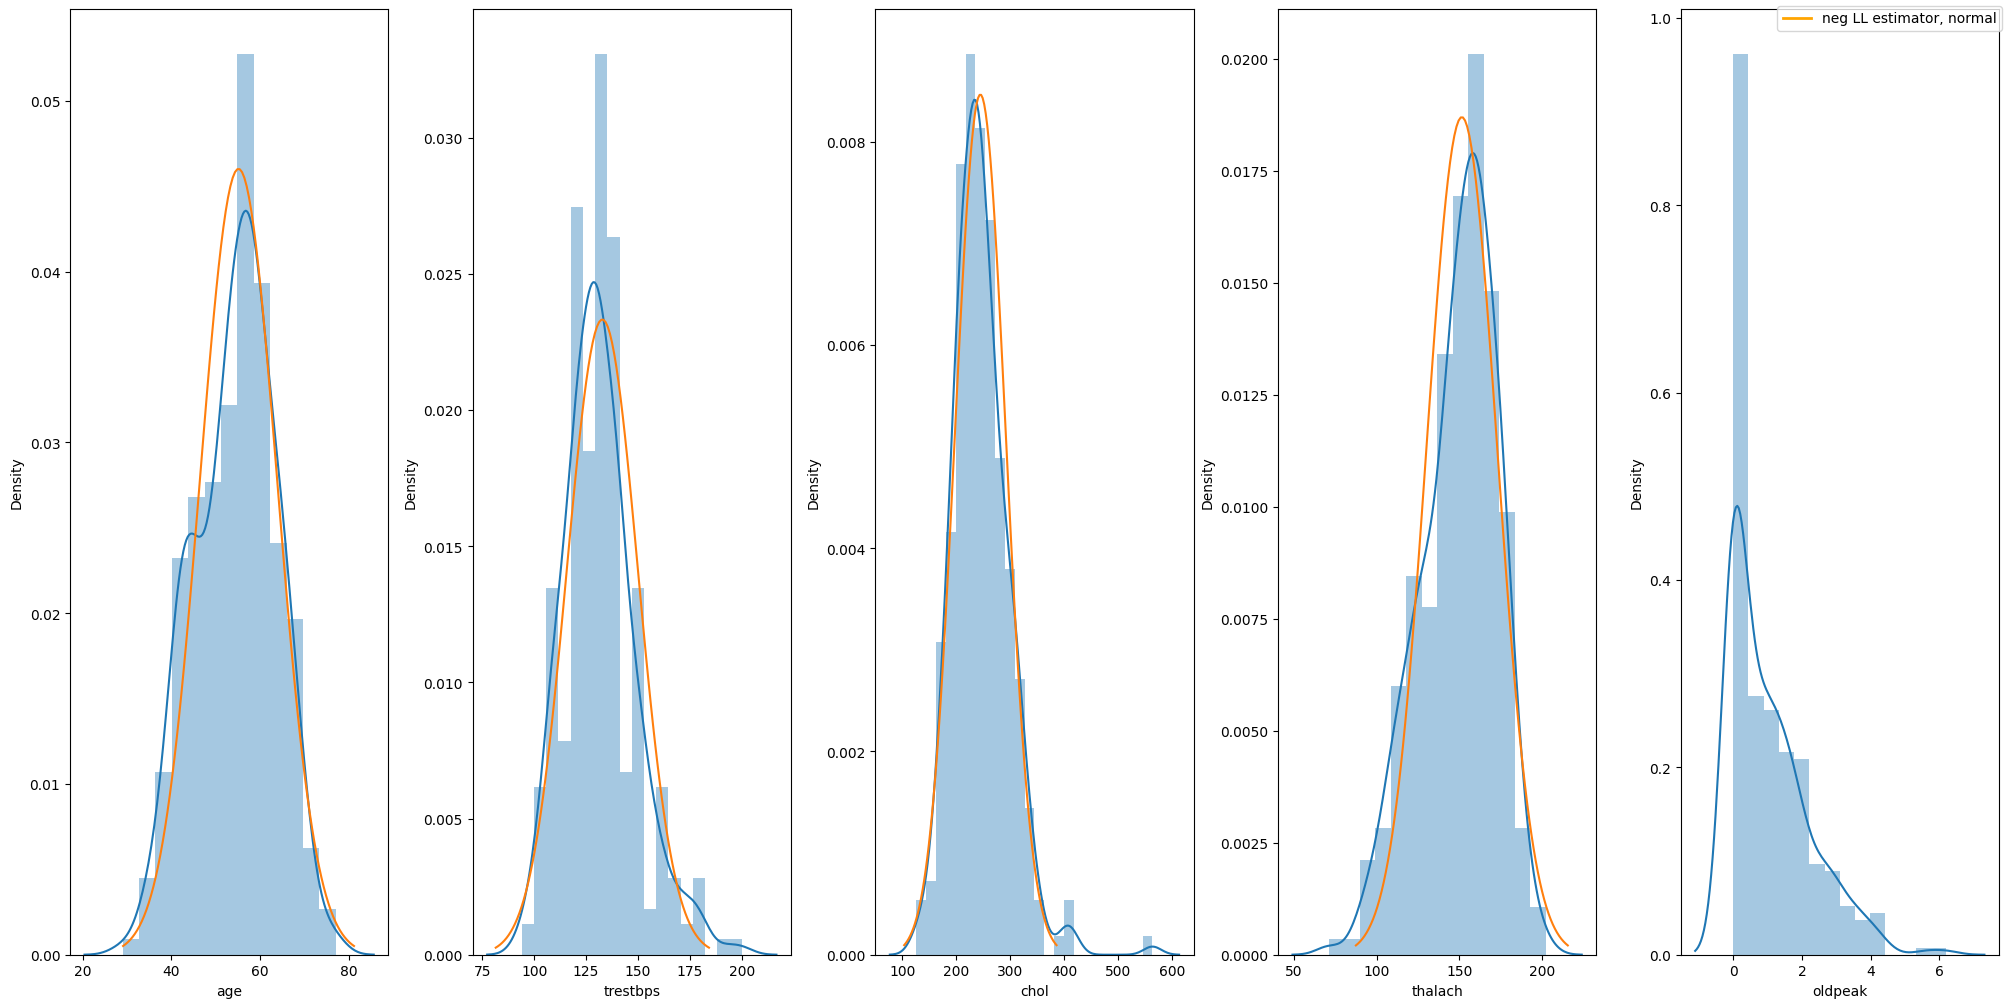

In [10]:
from matplotlib.lines import Line2D
a = np.linspace(nll_means[0] - 3*nll_stds[0], nll_means[0] + 3*nll_stds[0], 100)
b = np.linspace(nll_means[1] - 3*nll_stds[1], nll_means[1] + 3*nll_stds[1], 100)
c = np.linspace(nll_means[2] - 3*nll_stds[2], nll_means[2] + 3*nll_stds[2], 100)
d = np.linspace(nll_means[3] - 3*nll_stds[3], nll_means[3] + 3*nll_stds[3], 100)

axs[0].plot(a, stats.norm.pdf(a, loc=nll_means[0], scale=nll_stds[0]))
axs[1].plot(b, stats.norm.pdf(b, loc=nll_means[1], scale=nll_stds[1]))
axs[2].plot(c, stats.norm.pdf(c, loc=nll_means[2], scale=nll_stds[2]))
axs[3].plot(d, stats.norm.pdf(d, loc=nll_means[3], scale=nll_stds[3]))


legend_elements = [Line2D([0], [0], color='orange', lw=2, label='neg LL estimator, normal')]
fig2.legend(handles=legend_elements)
fig2

For the feature oldpeak, we assume that it follows a Poisson distribution with parameter ${\lambda}$. When calculating the derivative of the natural log likelihood function with respect to ${\lambda}$ we obtain: $$\frac{d}{d{\lambda}}l({\lambda}; x_1,...,x_n)=-n+\frac{1}{{\lambda}}\sum_{j=1}^{n} {x_j}$$ When setting the previous function to 0 and isolating ${\lambda}$ we get: $${\lambda}=\frac{1}{n}\sum_{j=1}^{n} {x_j}$$

In [11]:
# Calculate lambda
n = 303
s = 0
for x in df["oldpeak"]:
    s =  s + x
l = (1/n)*s
print(f"Lambda = {l}")

Lambda = 1.0366336633663367


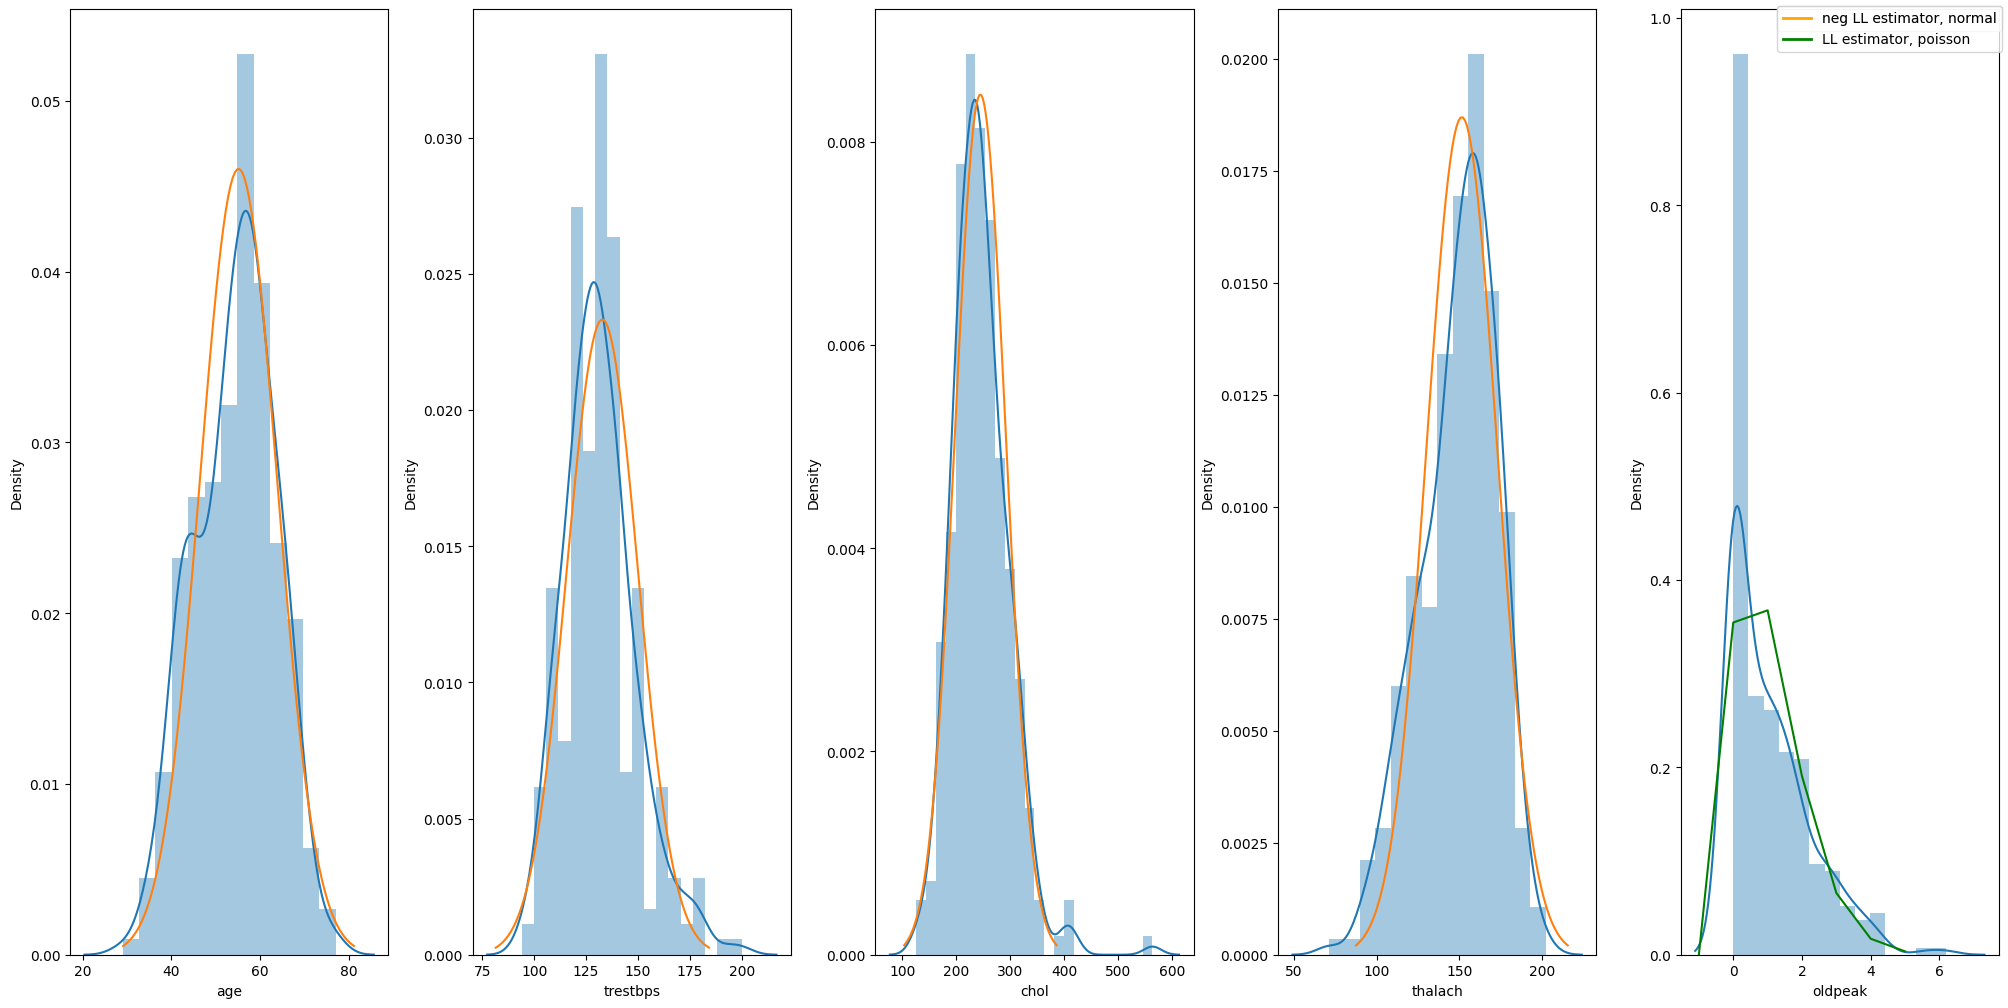

In [12]:
# Add poisson to figure

# creating a numpy array for x-axis
x = np.arange(-1, 6, 1)
# poisson distribution data for y-axis
y = stats.poisson.pmf(x, mu=l)
# plotting the graph
axs[4].plot(x, y, color = "green")

legend_elements = [Line2D([0], [0], color='orange', lw=2, label='neg LL estimator, normal'), Line2D([0], [0], color='green', lw=2, label='LL estimator, poisson')]
fig2.legend(handles=legend_elements)
fig2

**3. For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).**

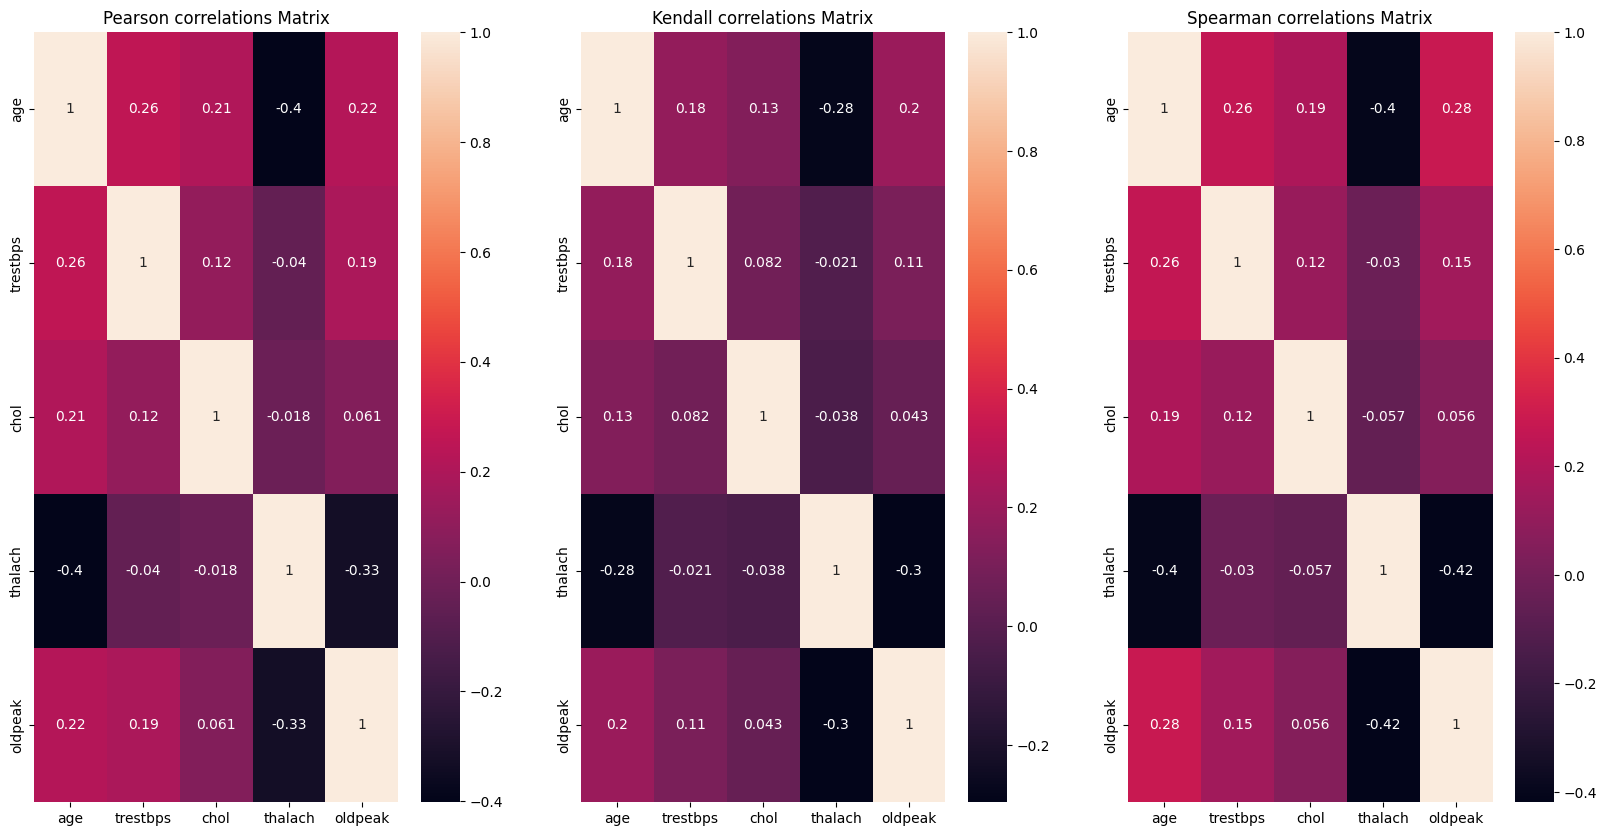

In [13]:
# Calculating correlations
corr_p = df2.corr(method="pearson")
corr_k = df2.corr(method="kendall")
corr_s = df2.corr(method="spearman")

# Plotting the correlations on heatmaps
fig3, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
axs = axs.flatten()

sns.heatmap(corr_p, annot= True, ax=axs[0])
sns.heatmap(corr_k, annot= True, ax=axs[1])
sns.heatmap(corr_s, annot= True,ax=axs[2])

axs[0].set_title('Pearson correlations Matrix')
axs[1].set_title('Kendall correlations Matrix')
axs[2].set_title('Spearman correlations Matrix')

plt.show()

We proceed to calculate the p-values for the correlations to identify if such correlations are significant.

In [14]:
from scipy.stats import pearsonr, kendalltau, spearmanr

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues_p = dfcols.transpose().join(dfcols, how='outer')
    pvalues_k = dfcols.transpose().join(dfcols, how='outer')
    pvalues_s = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues_p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
            pvalues_k[r][c] = round(kendalltau(tmp[r], tmp[c])[1], 4)
            pvalues_s[r][c] = round(spearmanr(tmp[r], tmp[c])[1], 4)
    return print("Pearson p-values\n",pvalues_p,"\n\n Kendall p-values\n", pvalues_k,"\n\n Spearman p-values\n", pvalues_s)

calculate_pvalues(df2)

Pearson p-values
              age trestbps    chol thalach oldpeak
age          0.0      0.0  0.0003     0.0  0.0001
trestbps     0.0      0.0   0.045  0.4838  0.0007
chol      0.0003    0.045     0.0  0.7578  0.2926
thalach      0.0   0.4838  0.7578     0.0     0.0
oldpeak   0.0001   0.0007  0.2926     0.0     0.0 

 Kendall p-values
              age trestbps    chol thalach oldpeak
age          0.0      0.0  0.0009     0.0     0.0
trestbps     0.0      0.0  0.0379  0.5941  0.0103
chol      0.0009   0.0379     0.0  0.3262  0.2852
thalach      0.0   0.5941  0.3262     0.0     0.0
oldpeak      0.0   0.0103  0.2852     0.0     0.0 

 Spearman p-values
             age trestbps    chol thalach oldpeak
age         0.0      0.0   0.001     0.0     0.0
trestbps    0.0      0.0  0.0349  0.6024  0.0091
chol      0.001   0.0349     0.0   0.325  0.3282
thalach     0.0   0.6024   0.325     0.0     0.0
oldpeak     0.0   0.0091  0.3282     0.0     0.0


The p-value is the probability that we would have found the current result if the correlation coefficient were in fact zero (null hypothesis). We assume that with p-value < 0.05 the correlation coeficient is statistically significant. Hence, the features with the most significant correlation for all three correlation methods (Pearson, Kendall and Spearman) are:
* Thalach and Age: negative correlation (spearman ${\rho}=-0.4$)
* Thalach and Oldpeak: negative correlation (spearman: ${\rho}=-0.42$)

Text(0.5, 1.2, 'Thalach and Age Jointplot')

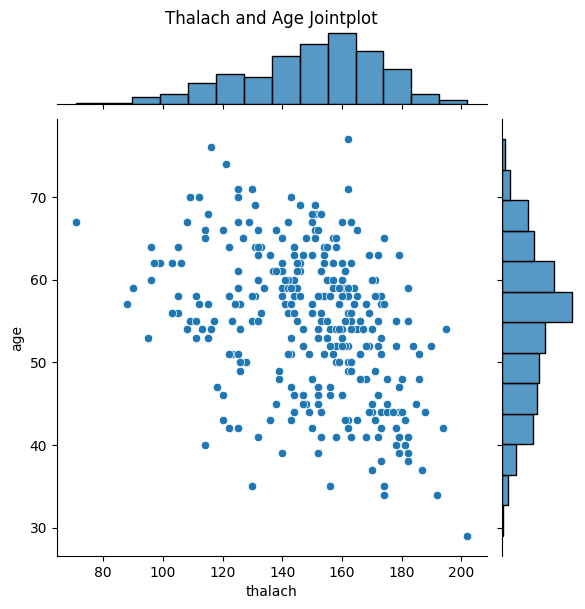

In [15]:
# Draw jointplot for thalach-age
sns.jointplot(x = 'thalach', y = 'age', edgecolor="white", data=df2)
plt.title("Thalach and Age Jointplot", y=1.2, fontsize = 12)

Text(0.5, 1.2, 'Thalach and Oldpeak Jointplot')

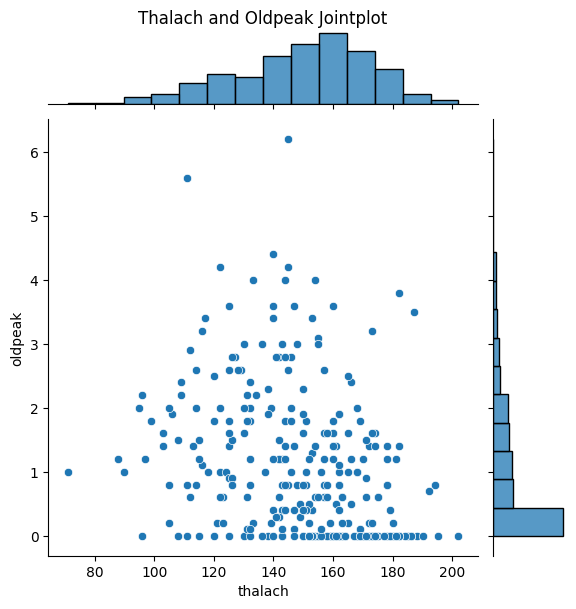

In [16]:
# Draw jointplot for thalach-oldpeak
sns.jointplot(x = 'thalach', y = 'oldpeak', edgecolor="white", data=df2)
plt.title("Thalach and Oldpeak Jointplot", y=1.2, fontsize = 12)

A bivariate normal distribution is made up of two independent random variables that are both normally distributed and have a normal distribution when they are added together. In this case, the features that were found to have the strongest correlations are not all normally distributed. Indeed, on a previous section, the feature oldpeak was found to follow a poisson distribution. Hence, we will draw the bivariate pdf for the bivariate normal distribution made up by thalach and age, both independent and normally distributed variables.

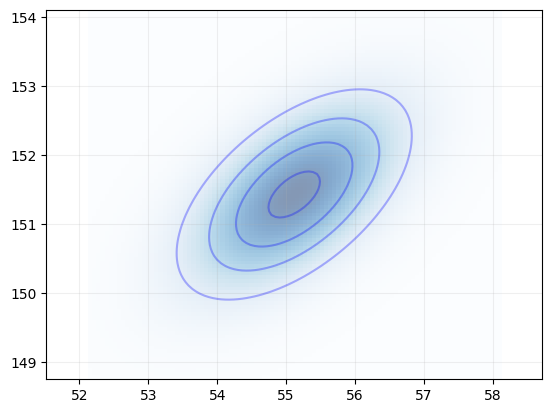

In [17]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [nll_means[0], nll_means[3]] #age mean, thalach mean
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [19]:
print(df["age"].var())
print(df["thalach"].var())

80.35453412890958
522.5167092868227


In [29]:
np.cov(df["age"], df["thalach"])

array([[ 80.35453413, -82.30496361],
       [-82.30496361, 522.51670929]])

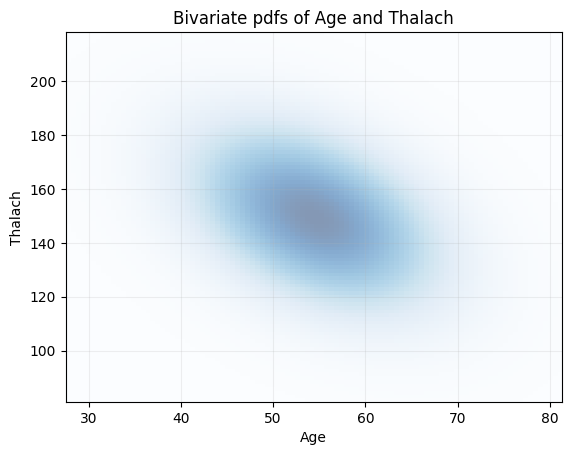

In [33]:
from scipy.stats import multivariate_normal as mn

def plot_2d_Gaussian_pdf(means, cov, title, x, y):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    #ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.title(f"{title}")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.show()
    
means = [df["age"].mean(), df["thalach"].mean()]
title = "Bivariate pdfs of Age and Thalach"
x="Age"
y="Thalach"
cov = np.cov(df["age"], df["thalach"])
plot_2d_Gaussian_pdf(means, cov, title, x, y)

**4. Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?**

In [21]:
# Extract the dataset with numerical values for males and females
df_mal = df.query("sex==1")
df_mal = df_mal[["age","trestbps","chol","thalach","oldpeak"]]

df_fem = df.query("sex==0")
df_fem = df_fem[["age","trestbps","chol","thalach","oldpeak"]]

To graphically represent only the significant correlations with a p-value smaller than 0.05 (95% confidence) we modify the code provided by Björn on April 2020 (Link to the code: https://stackoverflow.com/questions/57226054/seaborn-correlation-matrix-with-p-values-with-python).

In [22]:
def plot_cor_matrix(corr, mask=None, title=title):
    f, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f"{title}")
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

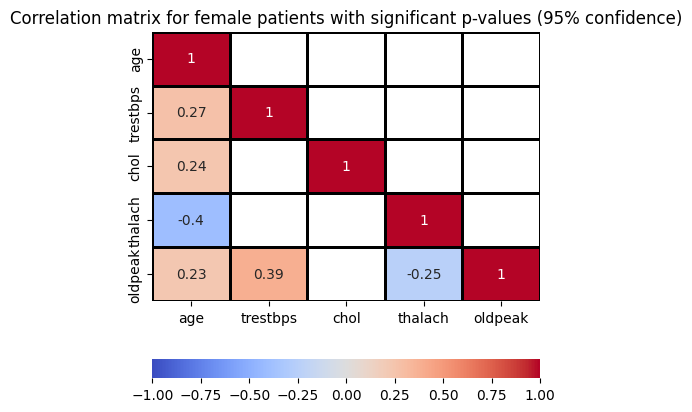

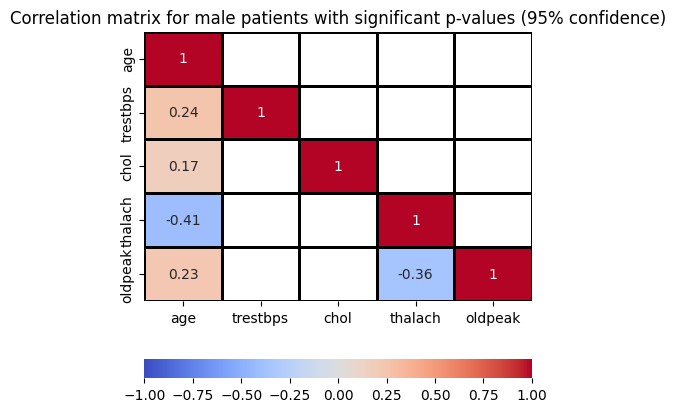

In [23]:
# Plotting with significance filter
corr_fem = df_fem.corr()                            # get correlation female
p_values_fem = corr_sig(df_fem)                     # get p-Value female
mask_fem = np.invert(np.tril(p_values_fem<0.05))    # mask - only get significant corr female

corr_mal = df_mal.corr()                            # get correlation male
p_values_mal = corr_sig(df_mal)                     # get p-Value male
mask_mal = np.invert(np.tril(p_values_mal<0.05))    # mask - only get significant corr male

# PLots
plot_cor_matrix(corr_fem,mask_fem, title="Correlation matrix for female patients with significant p-values (95% confidence)")
plot_cor_matrix(corr_mal,mask_mal, title="Correlation matrix for male patients with significant p-values (95% confidence)")

Hence, we can draw the following conclusions:
* The correlation between trestbps and oldpeak is significant for female patients where as for male patients it is not.
* The correlation between oldpeak and age is the same value and significant for both female and male patients.
* Female patients have a slightly more important correlation between trestbps and age, and cholesterol and age than male patients.
* The correlation between thalach and oldpeak is sligthly higher for male patients than for female patients.

In [24]:
# Extract the dataset with numerical values for healthy and disease
df_disease = df.query("target==1")
df_disease = df_disease[["age","trestbps","chol","thalach","oldpeak"]]

df_healthy = df.query("target==0")
df_healthy = df_healthy[["age","trestbps","chol","thalach","oldpeak"]]

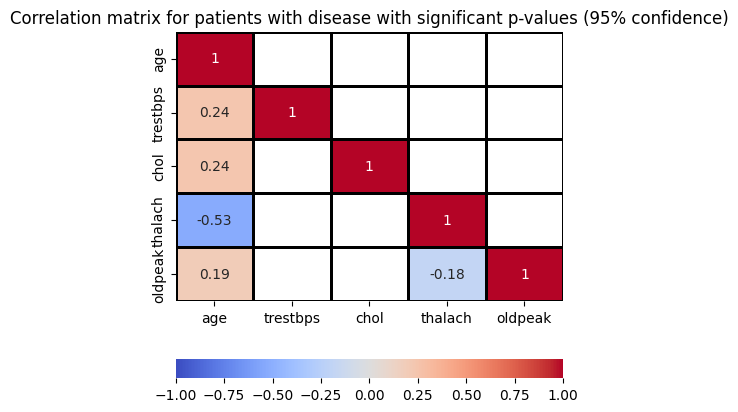

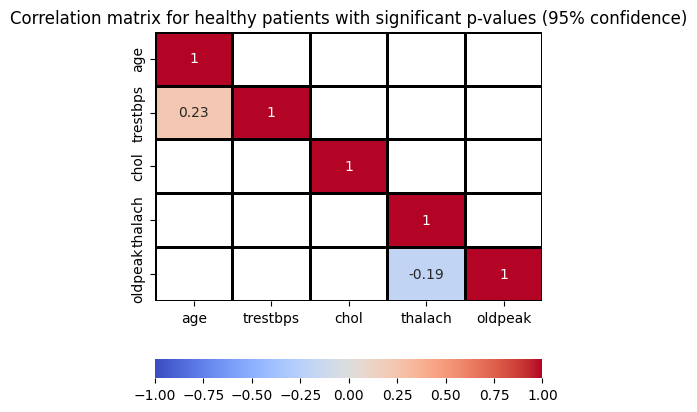

In [25]:
# Plotting with significance filter
corr_dis = df_disease.corr()                            # get correlation disease
p_values_dis = corr_sig(df_disease)                     # get p-Value disease
mask_dis = np.invert(np.tril(p_values_dis<0.05))    # mask - only get significant corr disease

corr_h = df_healthy.corr()                            # get correlation healthy
p_values_h = corr_sig(df_healthy)                     # get p-Value healthy
mask_h = np.invert(np.tril(p_values_h<0.05))    # mask - only get significant corr healthy

# PLots
plot_cor_matrix(corr_dis,mask_dis, title="Correlation matrix for patients with disease with significant p-values (95% confidence)")
plot_cor_matrix(corr_h,mask_h, title="Correlation matrix for healthy patients with significant p-values (95% confidence)")

Therefore, we can draw the following conclusions:
* The correlations age-oldpeak, age-thalach and age-chol are significant for patients with the disease whereas they are not significant for healthy patients.
* The correlations age-thalach, oldpeak-thalach have similar values and are significant for both healthy patients and patients with the disease.

**5. For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.**

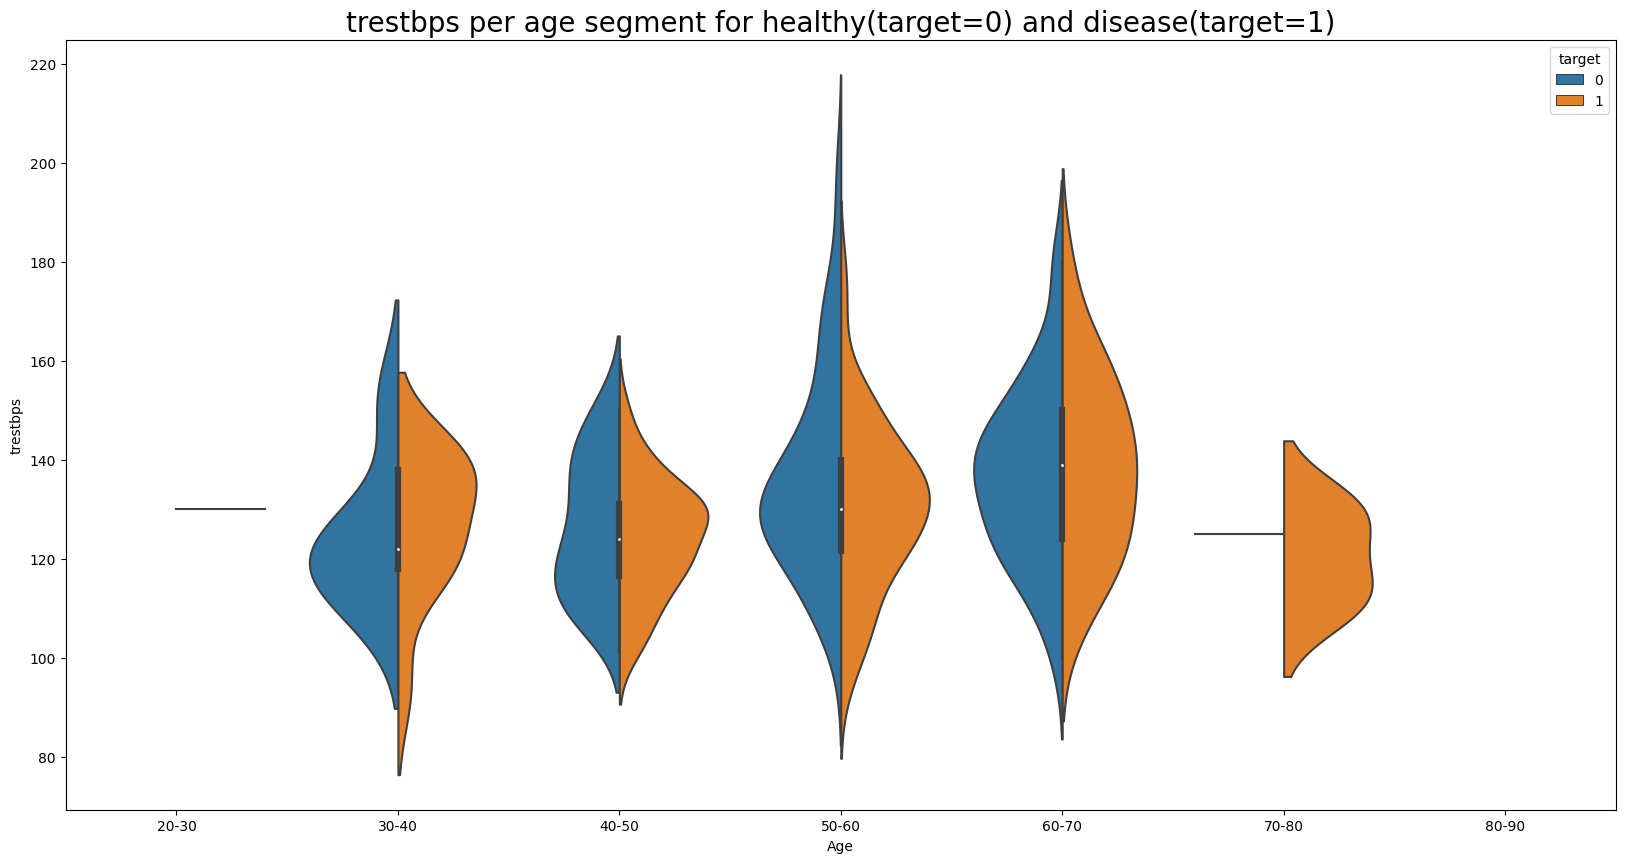

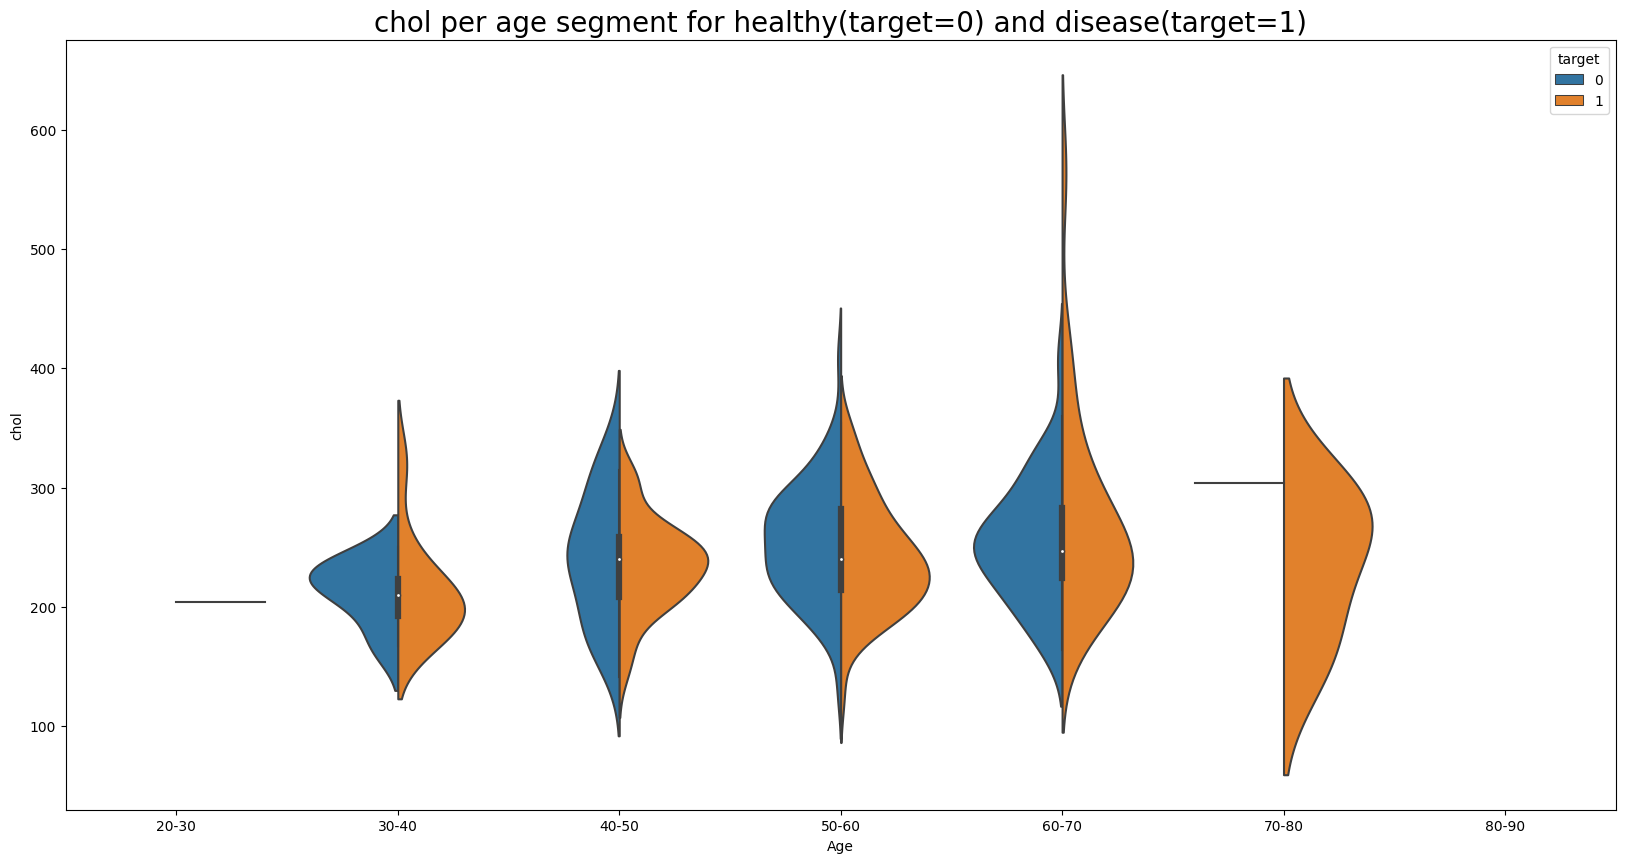

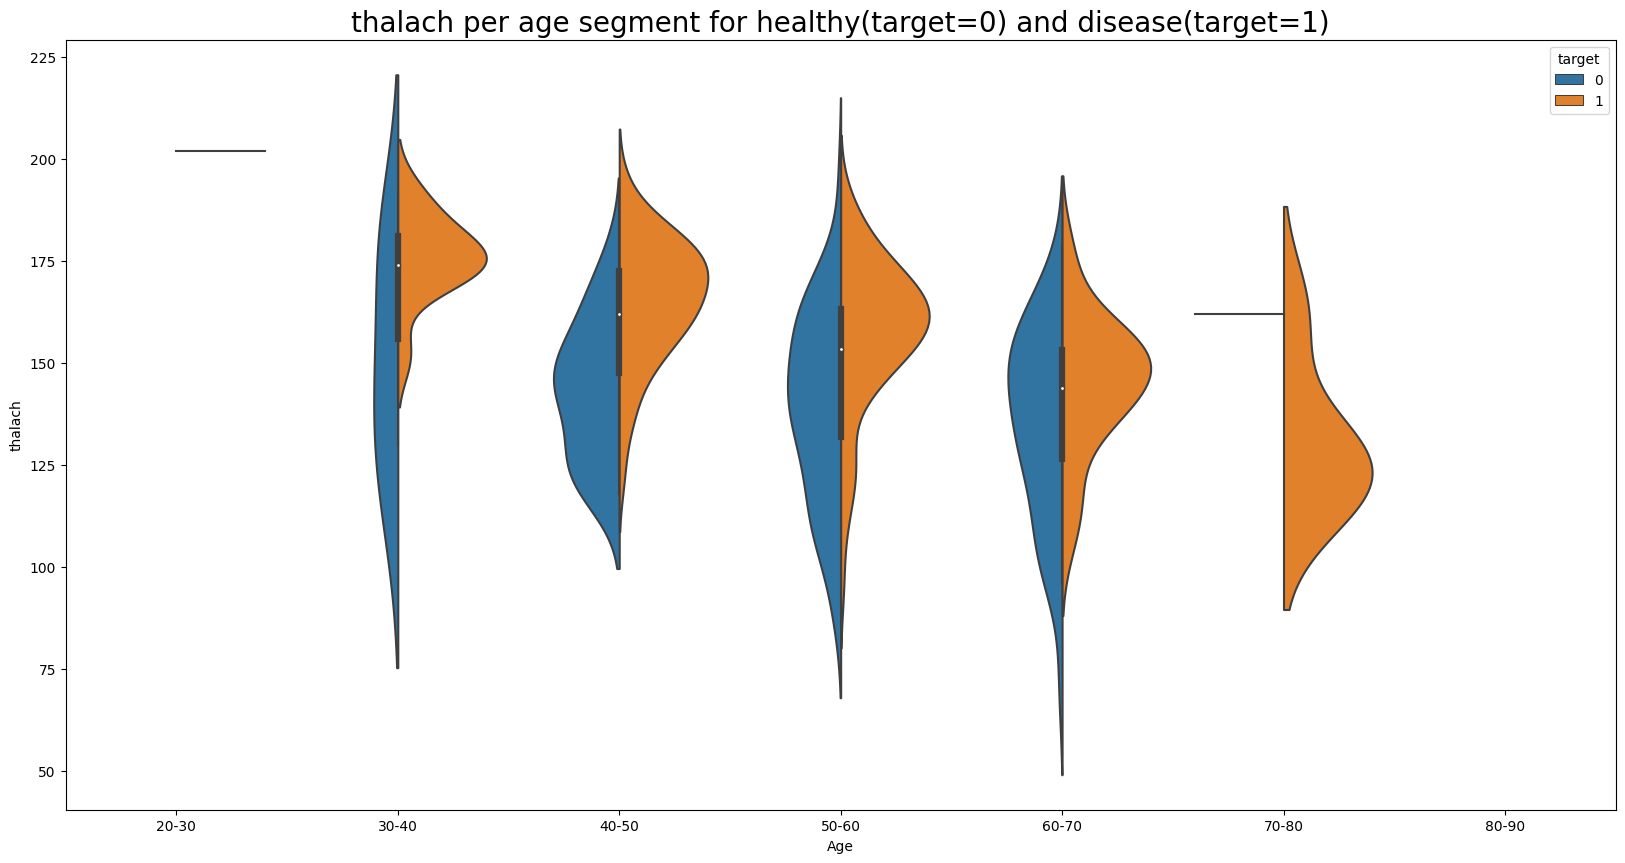

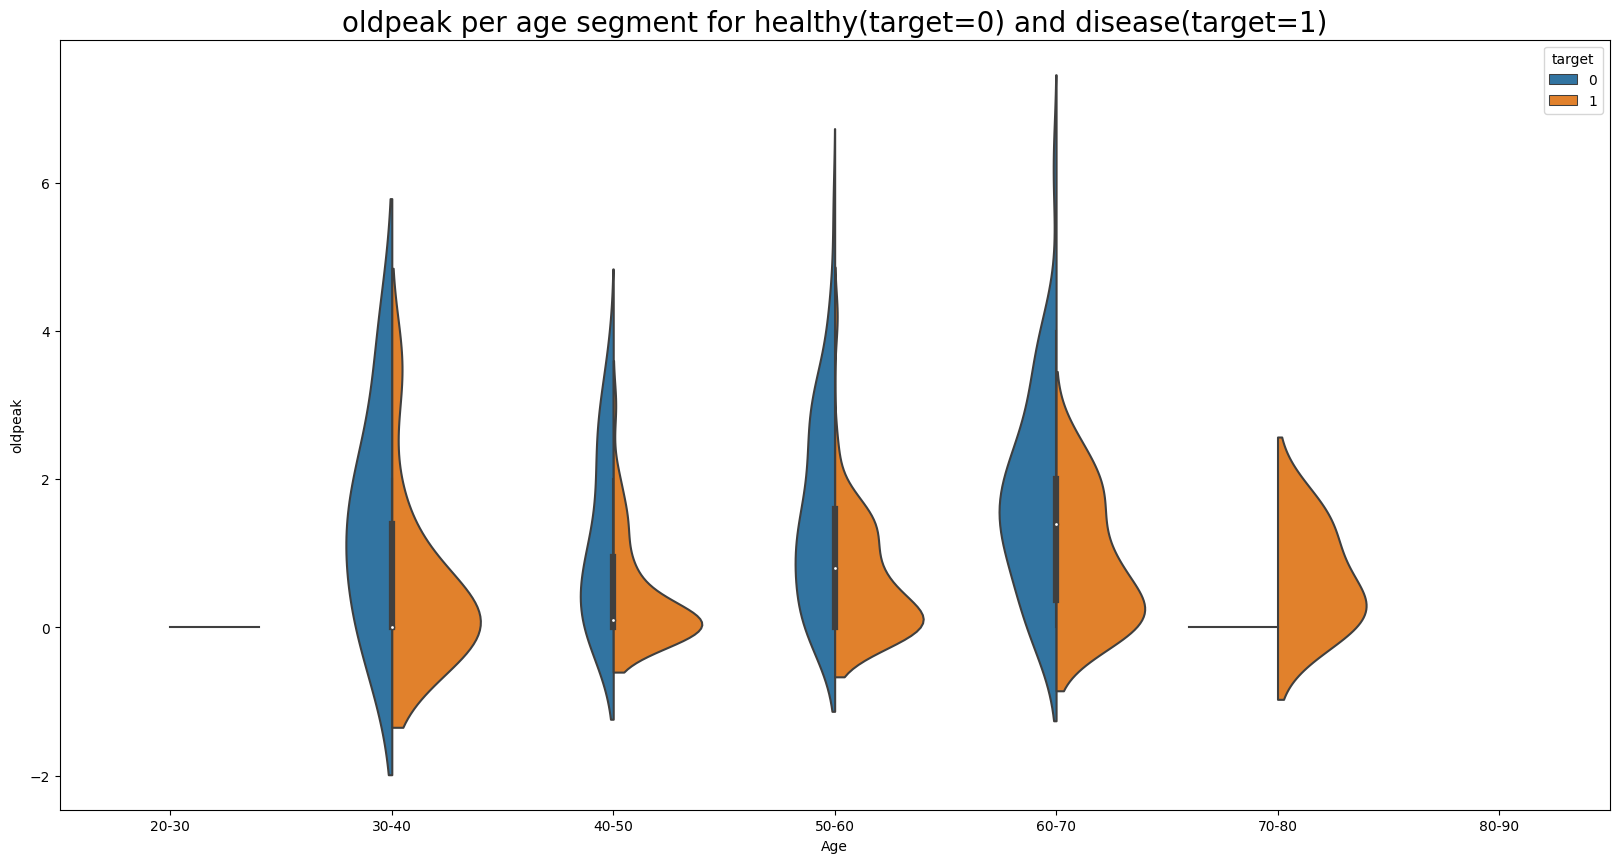

In [26]:
# Create temp df
df2_temp = df2.copy()

# Define bins of age
df2_temp['Age'] = pd.cut(df2['age'], bins=[20,30,40,50,60,70,80,90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

# Add the target column
df2_temp.insert(5,"target",df["target"],allow_duplicates=False)

# Plots
for i in numerical[1:]:
    fig=plt.figure(figsize=(20,10))
    f = sns.violinplot(data=df2_temp, x='Age', y=i, hue='target', split=True,  aspect=2);
    plt.title(f"{i} per age segment for healthy(target=0) and disease(target=1)", fontsize=20)

**6. Suggest, state and address at least one original question.**

In "Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease" (1999) Jousilahti et al. state that Coronary Heart Disease (CHD) is markedly more common in men than in women. The authors affirm that in both sexes, CHD risk increases with age. **Does the data from the UCI Heart Disease Dataset agree with such statements?**<br><br>Link to "Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease": https://www.ahajournals.org/doi/10.1161/01.CIR.99.9.1165

In [27]:
df_dis = df.query("target==1")
# Define bins of age
df_dis['age'] = pd.cut(df2['age'], bins=[20,30,40,50,60,70,80,90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

Text(0.5, 1.0, 'Proportion of male and female patients with disease per age')

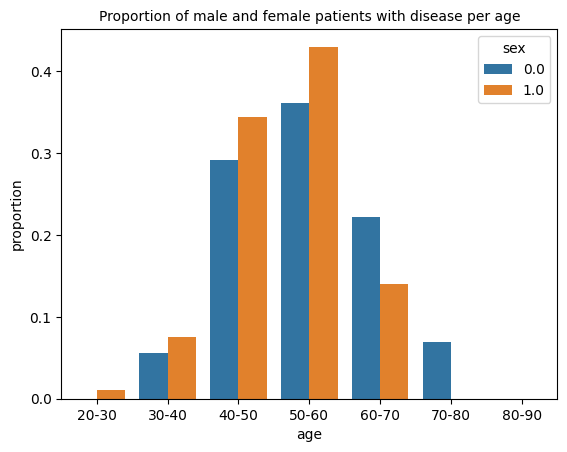

In [28]:
x, y, hue = "age", "proportion", "sex"

(df_dis[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.title("Proportion of male and female patients with disease per age", fontsize=10)

From the plot we infer that heart disease is indeed more common in male than female patients (in concordance with the study's statement). However, it is important to clarify that in the dataset there is a bigger amount of male patients than female patients. From ages 20 to 60 there is an increase in the amount of patients with disease for both female and male patients. This is also in agreement with the study's statement that the risk of heart disease increases with age. Nevertheless, there is a decrease in the amount of both female and male patients with disease after age 60. Also, the amount of patients per age category is different, so the results might be influenced by this.

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

Taking $X{\sim}lognormal({\mu}=0,{\sigma}=1)$ and $f$ be the probability density function of the lognormal:
$f(x)=\frac{1}{x\sqrt{2\pi}} * e^{\frac{-1}{2}ln(x)^2}$
$$\lim_{x\to\infty} e^{tx}*(1-\int_{-\infty}^{x} f(u)du \,)= \lim_{x\to\infty} \frac{(1-\int_{-\infty}^{x} f(u)du \,)}{e^{-tx}}$$
Applying L'Hopital we obtain:
$$\lim_{x\to\infty} \frac{-f(x)}{-te^{-tx}}=\lim_{x\to\infty} \frac{e^{\frac{-ln^2(x)}{2}}}{-te^{-tx}}=\infty$$
Since ${t}$ is a constant, $e^{\frac{-ln^2(x)}{2}}$ will grow bigger than $-te^{-tx}$ towards infinity. Hence, the standard log-normal distribution has a heavy right tail.

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

**1. What is $P(R = 0)$?**

$P(R=0)=P(a_1>q)=P(min(\overrightarrow{x_n})>q)=\prod_{i = 1}^{n} P(x_i>q)=\prod_{i = 1}^{n} [1-P(x_i\leq{q})]=\prod_{i = 1}^{n} [1-0.8]=(0.2)^n$

**2. What is the distribution of $R$?**

To identify the distribution of $R$ we procede to calculate a few probabilities to detect a pattern:
<br>
$$P(R=1)=P(a_1\leq{q})*\prod_{i = 2}^{n} P(a_i>q)$$
$$P(R=2)=\prod_{i = 1}^{2} P(a_i\leq{q})*\prod_{i = 3}^{n} P(a_i>q)$$
$$P(R=k)=\prod_{i = 1}^{k} P(a_i\leq{q})*\prod_{i = k}^{n} P(a_i>q)=0.8^k*(1-0.8)^{n-k}$$
<br>
Considering that the k successes can occur over anywhere among the n trials, there are ${n}\choose{k}$ different ways of distributing k successes in a sequence of n trials. Therefore, we obtain for $R$ a Binomial distribution with $p=0.8$:
$$P(R=k)={{n}\choose{k}}*0.8^k*(1-0.8)^{n-k}$$

**3. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.**

In [52]:
def get_lambda(n,p,r):
    # Create an array to save the indices
    indices = np.arange(n)
    # Obtain the cummulative distribution for binomial
    dist = stats.binom.cdf(indices, n, p)
    # Get max argument of indices
    l = np.argmax(dist > r)
    return l

**4. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?**

In [54]:
# Declare variables
n=100
q=0.8
a_lambda = []

# Generate 200 values from uniform distribution X
for i in range(200):
    values = stats.uniform.rvs(0,1,n)
    # Sort the values
    np.sort(values)
    # Save the a_lambda
    a_lambda.append(values[get_lambda(n,q,0.9)]<=q)

print(a_lambda)

[False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, False, True, False, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False

In [56]:
# Get amount of Trues
print(a_lambda.count(True))

156


Of 200 trials, we observed 156 times $a_{\lambda (n)} \le q$ which corresponds to an average of 78%.